# Trying Out Pandas

Pandas is a data manipulation and analysis module for Python which itegrates well with Jupyter Notebooks.

https://pandas.pydata.org/


This notebook trys out pandas, using data from Eric's report_usage table which records the number of times each Eric report is requested.

***Note to use this notebook Python, Jupyter Notebook, pandas and mathplotlib are required. Jump server 140 has all these.***

### Some introductory guides to pandas
http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/      
https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673

http://synesthesiam.com/posts/an-introduction-to-pandas.html


https://pandas.pydata.org/pandas-docs/stable/tutorials.html

Example using Coffee data    
https://www.youtube.com/watch?v=5XGycFIe8qE    

https://github.com/QCaudron/pydata_pandas    
https://github.com/QCaudron/pydata_pandas/blob/master/coffee_analysis_solution.ipynb    


### Notebook Config
- Import pandas
- Tweak for graph display

In [1]:
import pandas as pd
#import datetime
##import matplotlib.pyplot as plt
%matplotlib inline

### Sourcing The Data

Grab some report data from Eric database and export to tsv file, **eric_report_use.tsv**
```
select *  from report_usage 
where date_requested between '21-JAN-2016' and '31-JAN-2016'
order by date_requested, hour_requested
```
*Note with right Oracle Instant Client setup we should be able to run the query directly from this notebook instead*

**Read data into a dataframe**

In [2]:
csv_file = "eric_report_use.tsv"
eric_data = pd.read_csv(csv_file, sep='\t', skiprows=0)

**View dataset**   
- Can turn on/off scrollbar from Jupyter menu: **Cell > Current Outputs > Toggle Scrolling**
- Note when there are many rows only first and last 30 are displayed. To force display of all rows, the below can be used instead.

```
with pd.option_context('display.max_rows', None):
    display(eric_data)
```

In [3]:
#eric_data

One way of viewing a single column

In [4]:
#eric_data.REPORT_ID

Another way of viewing a single column

In [5]:
#eric_data["REPORT_ID"]

### Way of viewing particular columns

In [6]:
#eric_data[["DATE_REQUESTED","HOUR_REQUESTED"]]

### Iteration by row

In [7]:
# Iterating just gives the columns
##for row in eric_data:
##    print row

In [8]:
# To iterate through rows use iterrows
"""
for index, row in eric_data.iterrows():
    print index
    print row
    print "\n"
"""

'\nfor index, row in eric_data.iterrows():\n    print index\n    print row\n    print "\n"\n'

### Extract results for just one report type

In [40]:
# Extract rows with report_id ==1
# Also just keep three columns
report1_data = eric_data.loc[eric_data['REPORT_ID'] == 1, ["DATE_REQUESTED", "HOUR_REQUESTED", "NO_OF_REQUESTS"]]

# remove report_id column from this set
#report1_data = report1_data[['DATE_REQUESTED', 'HOUR_REQUESTED', 'NO_OF_REQUESTS']]

In [10]:
##report1_data

In [41]:
#Lets get rid of by-hour results
report1_daily = report1_data.groupby("DATE_REQUESTED").sum().NO_OF_REQUESTS


display(report1_daily)

DATE_REQUESTED
21/01/2016    19
22/01/2016     8
23/01/2016     4
25/01/2016    21
26/01/2016    21
27/01/2016    14
28/01/2016     6
29/01/2016    14
30/01/2016     1
Name: NO_OF_REQUESTS, dtype: int64

In [26]:
#make function to do the above
def daily(df, report_id=1):
    report_data = df.loc[df['REPORT_ID'] == report_id, ["DATE_REQUESTED", "HOUR_REQUESTED", "NO_OF_REQUESTS"]]
    report_daily = report_data.groupby("DATE_REQUESTED").sum().NO_OF_REQUESTS
    return report_daily
    

In [33]:
daily_figures = []
for report_id in (1, 2, 3, 6):
    temp = daily(eric_data, report_id)
    daily_figures.append(temp)
daily_figures

[DATE_REQUESTED
 21/01/2016    19
 22/01/2016     8
 23/01/2016     4
 25/01/2016    21
 26/01/2016    21
 27/01/2016    14
 28/01/2016     6
 29/01/2016    14
 30/01/2016     1
 Name: NO_OF_REQUESTS, dtype: int64, DATE_REQUESTED
 21/01/2016    66
 22/01/2016    37
 23/01/2016     9
 24/01/2016     4
 25/01/2016    49
 26/01/2016    56
 27/01/2016    32
 28/01/2016    43
 29/01/2016    42
 30/01/2016     9
 31/01/2016     3
 Name: NO_OF_REQUESTS, dtype: int64, DATE_REQUESTED
 21/01/2016    41
 22/01/2016    24
 23/01/2016     5
 24/01/2016     2
 25/01/2016    27
 26/01/2016    35
 27/01/2016    27
 28/01/2016    25
 29/01/2016    37
 30/01/2016     8
 31/01/2016     4
 Name: NO_OF_REQUESTS, dtype: int64, DATE_REQUESTED
 21/01/2016    7
 22/01/2016    3
 23/01/2016    1
 26/01/2016    3
 27/01/2016    3
 28/01/2016    4
 29/01/2016    5
 Name: NO_OF_REQUESTS, dtype: int64]

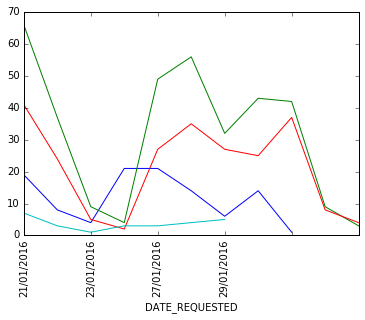

In [32]:
# Plot the results rot=90 sets x-axis text angle
for x in daily_figures:
    x.plot(rot=90)

Above bad as 0 values excluded, so results misleading

### Group By ?

In [13]:
eric_data_by_day = eric_data[["DATE_REQUESTED", "REPORT_ID" , "NO_OF_REQUESTS"]].groupby(['DATE_REQUESTED','REPORT_ID'])

In [14]:
eric_data_by_day_total = eric_data_by_day.sum()

In [15]:
#eric_data_by_day_total

# Idea
Reorganise the data in the new frame so that:

1. We have counts for each report in separate columns rather than relying on report_id: REPORT_1_COUNT, REPORT_2_COUNT ...
2. We have records of all the zero counts, i.e. we have rows for each hour of each day regardless of whether any report requests took place

Need to do some filtering by report ID

### Create empty dataframe for whole date rage with 0 values 

In [17]:
dates =  pd.date_range("2016/1/1", "2016/1/31")

In [18]:
df = pd.DataFrame({"Date":dates})
# Convert date format
df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')
rowcount = len(df)

In [19]:
# Add columns to hold counts for each report type
for i in (1,2,3,4,5,6):
    df["Report_"+str(i)] = [0]*rowcount
    

In [20]:
df

,Date,Report_1,Report_2,Report_3,Report_4,Report_5,Report_6
0,01/01/2016,0,0,0,0,0,0
1,02/01/2016,0,0,0,0,0,0
2,03/01/2016,0,0,0,0,0,0
3,04/01/2016,0,0,0,0,0,0
4,05/01/2016,0,0,0,0,0,0
5,06/01/2016,0,0,0,0,0,0
6,07/01/2016,0,0,0,0,0,0
7,08/01/2016,0,0,0,0,0,0
8,09/01/2016,0,0,0,0,0,0
9,10/01/2016,0,0,0,0,0,0


In [21]:
[0]*5

[0, 0, 0, 0, 0]